In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0,1,2,3"

ANACONDA_PATH = "/gpfs/projects/CascanteBonillaGroup/jmurrugarral/anaconda3/"

os.environ["PIP_CACHE_DIR"]= ANACONDA_PATH +".cache"
os.environ["HF_HOME"]=ANACONDA_PATH + ".cache"
os.environ["HF_DATASETS_CACHE"]=ANACONDA_PATH + ".cache/datasets"
os.environ["TRANSFORMERS_CACHE"]=ANACONDA_PATH + ".cache/models"

In [2]:
from transformers import AutoProcessor
from vllm import LLM, SamplingParams
from qwen_vl_utils import process_vision_info
import torch

# Initialize the processor
processor = AutoProcessor.from_pretrained("Qwen/Qwen2.5-VL-72B-Instruct")

# Initialize the LLM
# from vllm.config import PoolerConfig
model = LLM(model="Qwen/Qwen2.5-VL-72B-Instruct", limit_mm_per_prompt={"image": 7}, tensor_parallel_size=4, dtype=torch.bfloat16)

/gpfs/projects/CascanteBonillaGroup/jmurrugarral/anaconda3/envs/py10-vlm/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/gpfs/projects/CascanteBonillaGroup/jmurrugarral/anaconda3/envs/py10-vlm/lib/python3.10/site-packages/transformers/utils/hub.py:105: FutureWarning: Using `TRANSFORMERS_CACHE` is deprecated and will be removed in v5 of Transformers. Use `HF_HOME` instead.
  warnings.warn(
2025-09-02 13:02:57,767	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outp

INFO 09-02 13:03:02 __init__.py:207] Automatically detected platform cuda.
INFO 09-02 13:03:54 config.py:549] This model supports multiple tasks: {'embed', 'classify', 'reward', 'score', 'generate'}. Defaulting to 'generate'.
INFO 09-02 13:03:54 config.py:1382] Defaulting to use mp for distributed inference
WARNING 09-02 13:03:54 arg_utils.py:1197] The model has a long context length (128000). This may cause OOM errors during the initial memory profiling phase, or result in low performance due to small KV cache space. Consider setting --max-model-len to a smaller value.
INFO 09-02 13:03:55 llm_engine.py:234] Initializing a V0 LLM engine (v0.7.3) with config: model='Qwen/Qwen2.5-VL-72B-Instruct', speculative_config=None, tokenizer='Qwen/Qwen2.5-VL-72B-Instruct', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, override_neuron_config=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.bfloat16, max_seq_len=128000, download_dir=None, load_format=auto, tensor_

Loading safetensors checkpoint shards:   0% Completed | 0/38 [00:00<?, ?it/s]
Loading safetensors checkpoint shards:   3% Completed | 1/38 [00:05<03:41,  5.98s/it]
Loading safetensors checkpoint shards:   5% Completed | 2/38 [00:11<03:33,  5.92s/it]
Loading safetensors checkpoint shards:   8% Completed | 3/38 [00:17<03:17,  5.65s/it]
Loading safetensors checkpoint shards:  11% Completed | 4/38 [00:22<03:09,  5.58s/it]
Loading safetensors checkpoint shards:  13% Completed | 5/38 [00:28<03:05,  5.61s/it]
Loading safetensors checkpoint shards:  16% Completed | 6/38 [00:34<03:02,  5.71s/it]
Loading safetensors checkpoint shards:  18% Completed | 7/38 [00:39<02:57,  5.71s/it]
Loading safetensors checkpoint shards:  21% Completed | 8/38 [00:45<02:54,  5.80s/it]
Loading safetensors checkpoint shards:  24% Completed | 9/38 [00:51<02:48,  5.80s/it]
Loading safetensors checkpoint shards:  26% Completed | 10/38 [00:58<02:48,  6.01s/it]
Loading safetensors checkpoint shards:  29% Completed | 11/38

INFO 09-02 13:09:12 model_runner.py:1115] Loading model weights took 34.4339 GB
(VllmWorkerProcess pid=1272957) INFO 09-02 13:09:12 model_runner.py:1115] Loading model weights took 34.4339 GB
(VllmWorkerProcess pid=1272960) INFO 09-02 13:09:12 model_runner.py:1115] Loading model weights took 34.4339 GB
(VllmWorkerProcess pid=1272965) INFO 09-02 13:09:12 model_runner.py:1115] Loading model weights took 34.4339 GB
(VllmWorkerProcess pid=1272957) WARNING 09-02 13:09:13 model_runner.py:1288] Computed max_num_seqs (min(256, 128000 // 131072)) to be less than 1. Setting it to the minimum value of 1.
WARNING 09-02 13:09:13 model_runner.py:1288] Computed max_num_seqs (min(256, 128000 // 131072)) to be less than 1. Setting it to the minimum value of 1.
(VllmWorkerProcess pid=1272960) WARNING 09-02 13:09:13 model_runner.py:1288] Computed max_num_seqs (min(256, 128000 // 131072)) to be less than 1. Setting it to the minimum value of 1.
(VllmWorkerProcess pid=1272965) WARNING 09-02 13:09:13 model_

(VllmWorkerProcess pid=1272957) It looks like you are trying to rescale already rescaled images. If the input images have pixel values between 0 and 1, set `do_rescale=False` to avoid rescaling them again.
It looks like you are trying to rescale already rescaled images. If the input images have pixel values between 0 and 1, set `do_rescale=False` to avoid rescaling them again.
(VllmWorkerProcess pid=1272965) It looks like you are trying to rescale already rescaled images. If the input images have pixel values between 0 and 1, set `do_rescale=False` to avoid rescaling them again.
(VllmWorkerProcess pid=1272960) It looks like you are trying to rescale already rescaled images. If the input images have pixel values between 0 and 1, set `do_rescale=False` to avoid rescaling them again.


(VllmWorkerProcess pid=1272957) WARNING 09-02 13:09:25 profiling.py:192] The context length (128000) of the model is too short to hold the multi-modal embeddings in the worst case (131072 tokens in total, out of which {'image': 114688, 'video': 16384} are reserved for multi-modal embeddings). This may cause certain multi-modal inputs to fail during inference, even when the input text is short. To avoid this, you should increase `max_model_len`, reduce `max_num_seqs`, and/or reduce `mm_counts`.
(VllmWorkerProcess pid=1272965) WARNING 09-02 13:09:25 profiling.py:192] The context length (128000) of the model is too short to hold the multi-modal embeddings in the worst case (131072 tokens in total, out of which {'image': 114688, 'video': 16384} are reserved for multi-modal embeddings). This may cause certain multi-modal inputs to fail during inference, even when the input text is short. To avoid this, you should increase `max_model_len`, reduce `max_num_seqs`, and/or reduce `mm_counts`.
WA

Capturing CUDA graph shapes:  97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 34/35 [00:23<00:00,  1.60it/s]

(VllmWorkerProcess pid=1272957) INFO 09-02 13:11:32 model_runner.py:1562] Graph capturing finished in 25 secs, took 1.20 GiB
(VllmWorkerProcess pid=1272960) INFO 09-02 13:11:32 model_runner.py:1562] Graph capturing finished in 24 secs, took 1.20 GiB
(VllmWorkerProcess pid=1272965) INFO 09-02 13:11:32 model_runner.py:1562] Graph capturing finished in 24 secs, took 1.20 GiB


Capturing CUDA graph shapes: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 35/35 [00:24<00:00,  1.43it/s]

INFO 09-02 13:11:32 model_runner.py:1562] Graph capturing finished in 24 secs, took 1.19 GiB
INFO 09-02 13:11:32 llm_engine.py:436] init engine (profile, create kv cache, warmup model) took 139.32 seconds


In [19]:
import cv2

# def extract_frames_in_memory(video_path, fps_interval=1):
#     cap = cv2.VideoCapture(video_path)
#     if not cap.isOpened():
#         raise ValueError(f"Cannot open video: {video_path}")

#     fps = cap.get(cv2.CAP_PROP_FPS)
#     frame_interval = int(fps * fps_interval)
#     total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

#     frames = []
#     frame_id = 0

#     while True:
#         ret, frame = cap.read()
#         if not ret:
#             break

#         if frame_id % frame_interval == 0:
#             frames.append(frame.copy())  # Append a copy of the frame to memory

#         frame_id += 1

#     cap.release()
#     return frames

# frames = extract_frames_in_memory("/gpfs/scratch/pcascantebon/walking_tours/single_file_downloads/Cologne_Germany - Cologne Germany walking tour [Cologne Germany walking tour] - [h_IYOSSPmgU]/chunk_000.mp4", fps_interval=10)

def extract_frames_in_memory(video_path, target_fps=7):
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        raise ValueError(f"Cannot open video: {video_path}")

    fps = cap.get(cv2.CAP_PROP_FPS)
    frame_interval = int(fps / target_fps)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    frames = []
    frame_id = 0

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        if frame_id % frame_interval == 0:
            frames.append(frame.copy())

        frame_id += 1

    cap.release()
    return frames

frames = extract_frames_in_memory("/gpfs/projects/CascanteBonillaGroup/datasets/walking_tours/downloads/Dubai_UAE - youtube video I9XB1gHvF74 [I9XB1gHvF74]/chunk_000.mp4", target_fps=2)

len(frames)

128

In [20]:
#!ls /gpfs/projects/CascanteBonillaGroup/datasets/walking_tours/downloads/

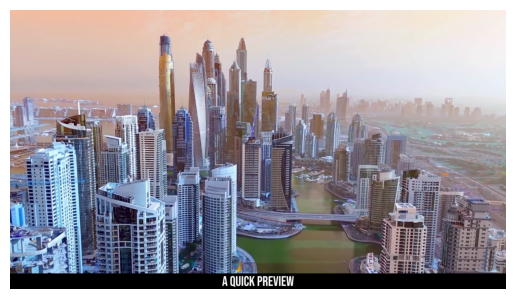

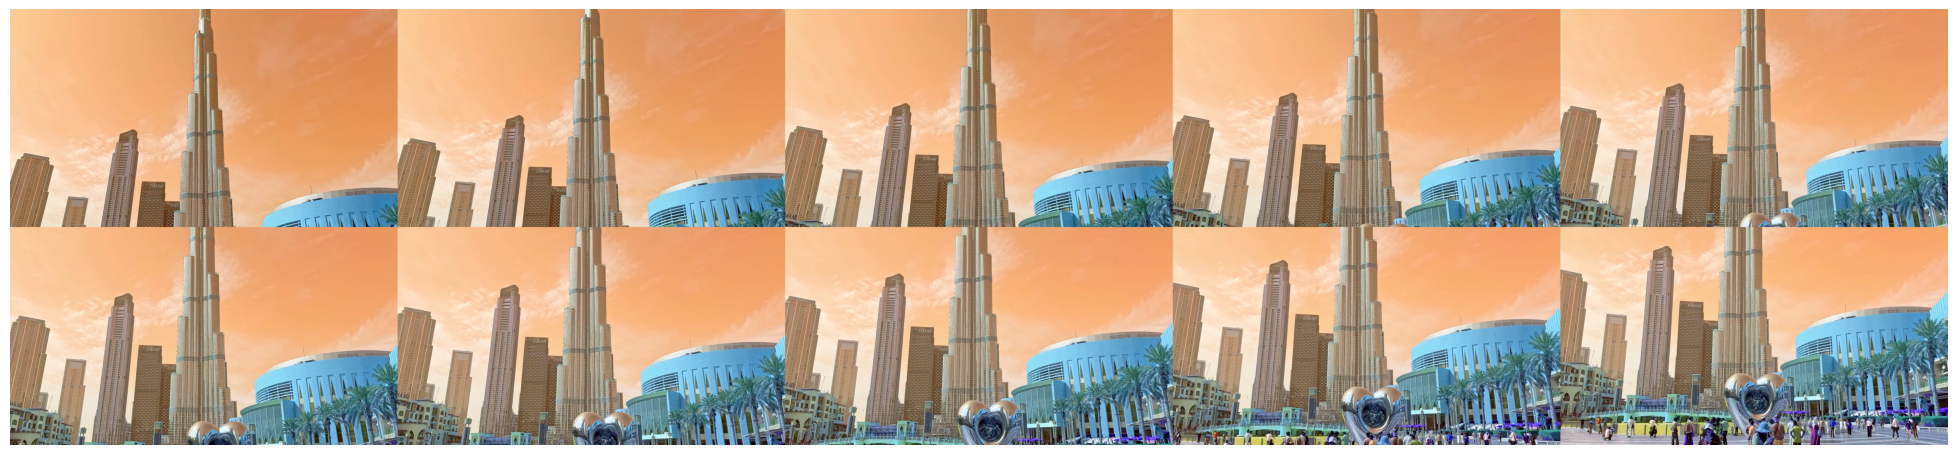

In [21]:
import matplotlib.pyplot as plt
import numpy as np

plt.imshow(frames[10])
plt.axis('off') 
plt.show()

#stack frames to show in a single row (for visualization purposes - 10 frames)
def stack_frames(frames, n_cols=5):
    n_rows = (len(frames) + n_cols - 1) // n_cols  # Calculate number of rows needed
    stacked_image = np.zeros((n_rows * frames[0].shape[0], n_cols * frames[0].shape[1], 3), dtype=frames[0].dtype)

    for idx, frame in enumerate(frames):
        row = idx // n_cols
        col = idx % n_cols
        stacked_image[row * frames[0].shape[0]:(row + 1) * frames[0].shape[0],
                      col * frames[0].shape[1]:(col + 1) * frames[0].shape[1]] = frame

    return stacked_image


plt.figure(figsize=(25, 20))
plt.imshow(stack_frames(frames[100:110], n_cols=5))
plt.axis('off') 
plt.show()



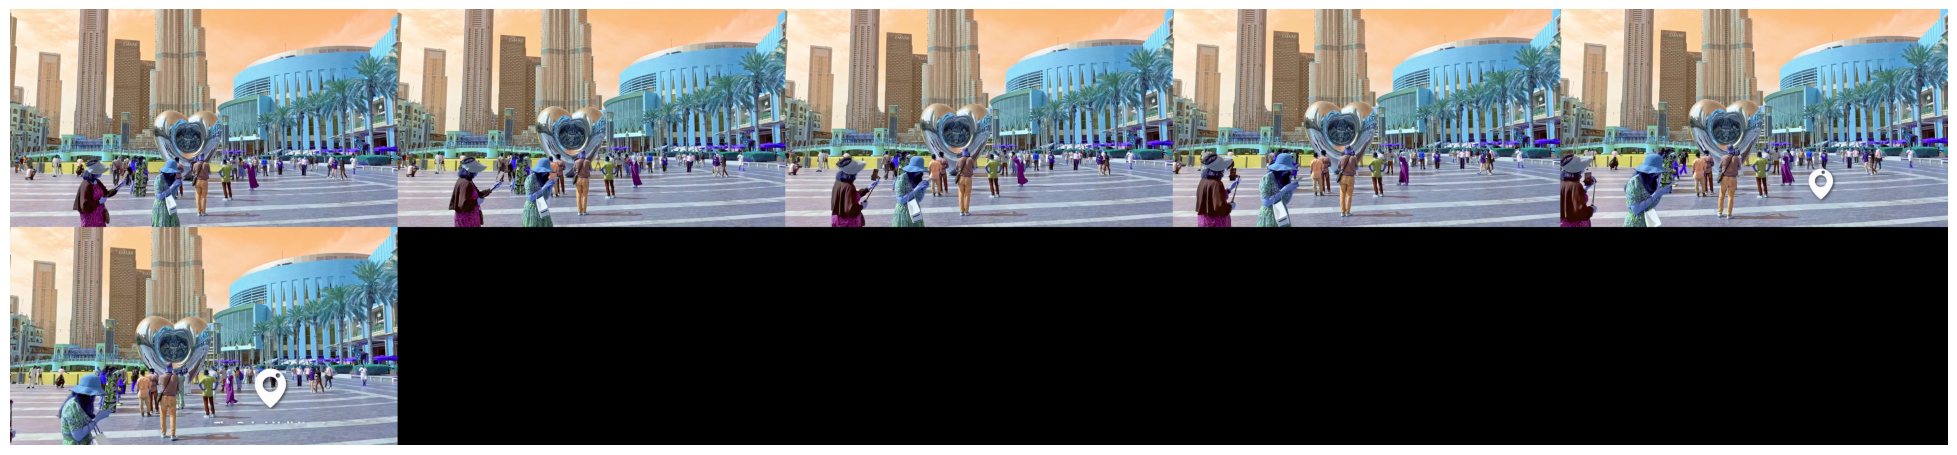

In [22]:
plt.figure(figsize=(25, 20))
plt.imshow(stack_frames(frames[114:120], n_cols=5))
plt.axis('off') 
plt.show()

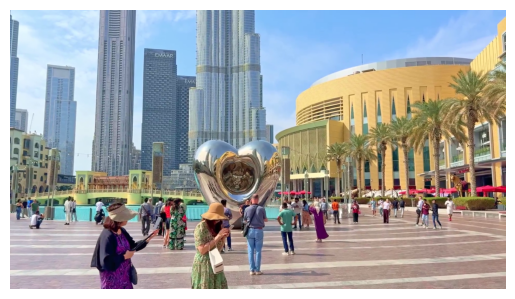

In [23]:
from PIL import Image

def cv2_to_pil(frame_bgr):
    frame_rgb = cv2.cvtColor(frame_bgr, cv2.COLOR_BGR2RGB)
    return Image.fromarray(frame_rgb)

plt.imshow(cv2_to_pil(frames[114]))
plt.axis('off') 
plt.show()

In [24]:
sampling_params = SamplingParams(
    temperature=0.1,
    top_p=0.001,
    repetition_penalty=1.05,
    max_tokens=500,
    stop_token_ids=[],
    logprobs=20,
)

# image_tmp = Image.open(rotated_image)
# h, w = image_tmp.size

messages = [
    {"role": "system", "content": "You are a helpful assistant."},
    {
        "role": "user",
        "content": [
            # { "type": "image", "image": cv2_to_pil(frames[110]) },
            # { "type": "image", "image": cv2_to_pil(frames[112]) },
            # { "type": "image", "image": cv2_to_pil(frames[113]) },
            { "type": "image", "image": cv2_to_pil(frames[114]) },
            { "type": "image", "image": cv2_to_pil(frames[115]) },
            { "type": "image", "image": cv2_to_pil(frames[116]) },
            { "type": "image", "image": cv2_to_pil(frames[117]) },
            { "type": "image", "image": cv2_to_pil(frames[118]) },
            { "type": "image", "image": cv2_to_pil(frames[119]) },
            { "type": "image", "image": cv2_to_pil(frames[120]) },
            {"type": "text", "text": "Based on the images provided, how many groups of people that may know each other can you identify?"},
        ],
    },
]

# processor = AutoProcessor.from_pretrained(MODEL_PATH)
prompt = processor.apply_chat_template(
    messages,
    tokenize=False,
    add_generation_prompt=True,
)
image_inputs, video_inputs = process_vision_info(messages)

mm_data = {}
if image_inputs is not None:
    mm_data["image"] = image_inputs
if video_inputs is not None:
    mm_data["video"] = video_inputs

llm_inputs = {
    "prompt": prompt,
    "multi_modal_data": mm_data,
}

outputs = model.generate([llm_inputs], sampling_params=sampling_params)
generated_text = outputs[0].outputs[0].text

print(generated_text)

Processed prompts: 100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:20<00:00, 20.32s/it, est. speed input: 929.78 toks/s, output: 6.60 toks/s]

In the images provided, it is challenging to definitively determine the number of groups of people who may know each other based solely on visual cues. However, I can identify several clusters of individuals who appear to be interacting or standing close together, which might suggest they know each other:

1. A group of people near the heart sculpture, some of whom are taking photos.
2. A few individuals walking together in the background.
3. A couple of people standing and talking near the palm trees.

Overall, there appear to be at least 3-4 distinct groups of people who might know each other. However, this is an estimate and not a definitive count.


In [27]:
sampling_params = SamplingParams(
    temperature=0.1,
    top_p=0.001,
    repetition_penalty=1.05,
    max_tokens=500,
    stop_token_ids=[],
    logprobs=20,
)

# image_tmp = Image.open(rotated_image)
# h, w = image_tmp.size

messages = [
    {"role": "system", "content": "You are a helpful assistant."},
    {
        "role": "user",
        "content": [
            # { "type": "image", "image": cv2_to_pil(frames[110]) },
            # { "type": "image", "image": cv2_to_pil(frames[112]) },
            # { "type": "image", "image": cv2_to_pil(frames[113]) },
            { "type": "image", "image": cv2_to_pil(frames[114]) },
            { "type": "image", "image": cv2_to_pil(frames[115]) },
            { "type": "image", "image": cv2_to_pil(frames[116]) },
            { "type": "image", "image": cv2_to_pil(frames[117]) },
            { "type": "image", "image": cv2_to_pil(frames[118]) },
            { "type": "image", "image": cv2_to_pil(frames[119]) },
            { "type": "image", "image": cv2_to_pil(frames[120]) },
            {"type": "text", "text": "Based on the images provided, how many groups of people that may know each other can you identify in the fifth image?"},
        ],
    },
]

# processor = AutoProcessor.from_pretrained(MODEL_PATH)
prompt = processor.apply_chat_template(
    messages,
    tokenize=False,
    add_generation_prompt=True,
)
image_inputs, video_inputs = process_vision_info(messages)

mm_data = {}
if image_inputs is not None:
    mm_data["image"] = image_inputs
if video_inputs is not None:
    mm_data["video"] = video_inputs

llm_inputs = {
    "prompt": prompt,
    "multi_modal_data": mm_data,
}

outputs = model.generate([llm_inputs], sampling_params=sampling_params)
generated_text = outputs[0].outputs[0].text

print(generated_text)

Processed prompts: 100%|███████████████████████████████████████████████████████████████████████████| 1/1 [00:18<00:00, 18.22s/it, est. speed input: 1037.12 toks/s, output: 5.82 toks/s]

In the fifth image, there are several groups of people that may know each other. Here are some identifiable groups:

1. A group of three people standing close together near the center-right of the image.
2. A group of two people walking together on the left side of the image.
3. A group of three people standing near the heart sculpture.
4. A group of two people walking together on the far right side of the image.

So, there are at least four groups of people that may know each other.


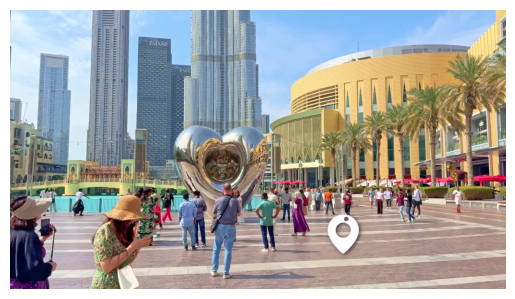

In [28]:
plt.imshow(cv2_to_pil(frames[118]))
plt.axis('off') 
plt.show()

In [29]:
sampling_params = SamplingParams(
    temperature=0.1,
    top_p=0.001,
    repetition_penalty=1.05,
    max_tokens=500,
    stop_token_ids=[],
    logprobs=20,
)

# image_tmp = Image.open(rotated_image)
# h, w = image_tmp.size

messages = [
    {"role": "system", "content": "You are a helpful assistant."},
    {
        "role": "user",
        "content": [
            #{ "type": "image", "image": cv2_to_pil(frames[110]) },
            #{ "type": "image", "image": cv2_to_pil(frames[112]) },
            #{ "type": "image", "image": cv2_to_pil(frames[113]) },
            { "type": "image", "image": cv2_to_pil(frames[114]) },
            { "type": "image", "image": cv2_to_pil(frames[115]) },
            { "type": "image", "image": cv2_to_pil(frames[116]) },
            { "type": "image", "image": cv2_to_pil(frames[117]) },
            { "type": "image", "image": cv2_to_pil(frames[118]) },
            { "type": "image", "image": cv2_to_pil(frames[119]) },
            { "type": "image", "image": cv2_to_pil(frames[120]) },
            {"type": "text", "text": generated_text},
            {"type": "text", "text": "Locate A group of three people standing close together near the center-right of the image. Output the bbox coordinates"},
        ],
    },
]

# processor = AutoProcessor.from_pretrained(MODEL_PATH)
prompt = processor.apply_chat_template(
    messages,
    tokenize=False,
    add_generation_prompt=True,
)
image_inputs, video_inputs = process_vision_info(messages)

mm_data = {}
if image_inputs is not None:
    mm_data["image"] = image_inputs
if video_inputs is not None:
    mm_data["video"] = video_inputs

llm_inputs = {
    "prompt": prompt,
    "multi_modal_data": mm_data,
}

outputs = model.generate([llm_inputs], sampling_params=sampling_params)
group_text = outputs[0].outputs[0].text

print(group_text)

Processed prompts: 100%|███████████████████████████████████████████████████████████████████████████| 1/1 [00:14<00:00, 14.80s/it, est. speed input: 1283.67 toks/s, output: 3.78 toks/s]

```json
[
	{"bbox_2d": [968, 705, 1046, 954], "label": "A group of three people standing close together near the center-right of the image."}
]
```


In [ ]:
from PIL import Image, ImageDraw, ImageFont
from PIL import ImageColor

def plot_text_inside_image(rotated_image_v2, data):
    cropped_image_tmp = rotated_image_v2.copy()
    draw = ImageDraw.Draw(cropped_image_tmp)

    # Try to load a TTF font; if not available, fallback to the default font
    try:
        font = ImageFont.truetype("arial.ttf", size=16)
    except IOError:
        font = ImageFont.load_default()

    # Iterate over each item, draw the bounding box and overlay the text
    for item in data:
        bbox = item["bbox_2d"]  # [x1, y1, x2, y2]
        text = item["label"]

        # Draw the rectangle using a red outline with a thickness of 2 pixels
        draw.rectangle(bbox, outline="red", width=2)

        # Position the text slightly above the bounding box (adjust offset as needed)
        text_position = (bbox[0], max(bbox[1] - 20, 0))
        draw.text(text_position, text, fill="blue", font=font)

    # Save and display the resulting image
    # output_path = 'output.jpg'
    # img.save(output_path)
    
    # cropped_image_tmp.show()
    plt.figure(figsize=(20, 20))
    plt.imshow(cropped_image_tmp)
    plt.axis('off')
    plt.show()  


plot_text_inside_image(cv2_to_pil(frames[110]), [{"bbox_2d": [907, 718, 1005, 1036], "label": "two women walking together in the foreground"},
	{"bbox_2d": [1163, 458, 1393, 1066], "label": "two women walking together in the foreground"}])  

In [ ]:
sampling_params = SamplingParams(
    temperature=0.1,
    top_p=0.001,
    repetition_penalty=1.05,
    max_tokens=500,
    stop_token_ids=[],
    logprobs=20,
)

# image_tmp = Image.open(rotated_image)
# h, w = image_tmp.size

messages = [
    {"role": "system", "content": "You are a helpful assistant."},
    {
        "role": "user",
        "content": [
            #{ "type": "image", "image": cv2_to_pil(frames[110]) },
            #{ "type": "image", "image": cv2_to_pil(frames[112]) },
            #{ "type": "image", "image": cv2_to_pil(frames[113]) },
            { "type": "image", "image": cv2_to_pil(frames[114]) },
            { "type": "image", "image": cv2_to_pil(frames[115]) },
            { "type": "image", "image": cv2_to_pil(frames[116]) },
            { "type": "image", "image": cv2_to_pil(frames[117]) },
            { "type": "image", "image": cv2_to_pil(frames[118]) },
            { "type": "image", "image": cv2_to_pil(frames[119]) },
            { "type": "image", "image": cv2_to_pil(frames[120]) },
            {"type": "text", "text": generated_text},
            {"type": "text", "text": "Locate the man with the suitcase and the woman next to him."},
        ],
    },
]

# processor = AutoProcessor.from_pretrained(MODEL_PATH)
prompt = processor.apply_chat_template(
    messages,
    tokenize=False,
    add_generation_prompt=True,
)
image_inputs, video_inputs = process_vision_info(messages)

mm_data = {}
if image_inputs is not None:
    mm_data["image"] = image_inputs
if video_inputs is not None:
    mm_data["video"] = video_inputs

llm_inputs = {
    "prompt": prompt,
    "multi_modal_data": mm_data,
}

outputs = model.generate([llm_inputs], sampling_params=sampling_params)
group_text = outputs[0].outputs[0].text

print(group_text)

In [ ]:
plot_text_inside_image(cv2_to_pil(frames[110]), [{"bbox_2d": [1098, 485, 1246, 847], "label": "man with the suitcase and the woman next to him"},
	{"bbox_2d": [1160, 459, 1392, 1066], "label": "man with the suitcase and the woman next to him"}])  

In [ ]:
sampling_params = SamplingParams(
    temperature=0.1,
    top_p=0.001,
    repetition_penalty=1.05,
    max_tokens=500,
    stop_token_ids=[],
    logprobs=20,
)

# image_tmp = Image.open(rotated_image)
# h, w = image_tmp.size

messages = [
    {"role": "system", "content": "You are a helpful assistant."},
    {
        "role": "user",
        "content": [
            #{ "type": "image", "image": cv2_to_pil(frames[110]) },
            #{ "type": "image", "image": cv2_to_pil(frames[112]) },
            #{ "type": "image", "image": cv2_to_pil(frames[113]) },
            { "type": "image", "image": cv2_to_pil(frames[114]) },
            { "type": "image", "image": cv2_to_pil(frames[115]) },
            { "type": "image", "image": cv2_to_pil(frames[116]) },
            { "type": "image", "image": cv2_to_pil(frames[117]) },
            { "type": "image", "image": cv2_to_pil(frames[118]) },
            { "type": "image", "image": cv2_to_pil(frames[119]) },
            { "type": "image", "image": cv2_to_pil(frames[120]) },
            {"type": "text", "text": generated_text},
            {"type": "text", "text": "Locate the group of people near the kiosk, including the man in the white shirt and the man in the blue shirt."},
        ],
    },
]

# processor = AutoProcessor.from_pretrained(MODEL_PATH)
prompt = processor.apply_chat_template(
    messages,
    tokenize=False,
    add_generation_prompt=True,
)
image_inputs, video_inputs = process_vision_info(messages)

mm_data = {}
if image_inputs is not None:
    mm_data["image"] = image_inputs
if video_inputs is not None:
    mm_data["video"] = video_inputs

llm_inputs = {
    "prompt": prompt,
    "multi_modal_data": mm_data,
}

outputs = model.generate([llm_inputs], sampling_params=sampling_params)
group_text = outputs[0].outputs[0].text

print(group_text)

In [ ]:
plot_text_inside_image(cv2_to_pil(frames[110]), [{"bbox_2d": [470, 469, 1005, 800], "label": "group of people near the kiosk, including the man in the white shirt and the man in the blue shirt."}])  

In [ ]:
sampling_params = SamplingParams(
    temperature=0.1,
    top_p=0.001,
    repetition_penalty=1.05,
    max_tokens=500,
    stop_token_ids=[],
    logprobs=20,
)

# image_tmp = Image.open(rotated_image)
# h, w = image_tmp.size

messages = [
    {"role": "system", "content": "You are a helpful assistant."},
    {
        "role": "user",
        "content": [
            #{ "type": "image", "image": cv2_to_pil(frames[110]) },
            #{ "type": "image", "image": cv2_to_pil(frames[112]) },
            #{ "type": "image", "image": cv2_to_pil(frames[113]) },
            { "type": "image", "image": cv2_to_pil(frames[114]) },
            { "type": "image", "image": cv2_to_pil(frames[115]) },
            { "type": "image", "image": cv2_to_pil(frames[116]) },
            { "type": "image", "image": cv2_to_pil(frames[117]) },
            { "type": "image", "image": cv2_to_pil(frames[118]) },
            { "type": "image", "image": cv2_to_pil(frames[119]) },
            { "type": "image", "image": cv2_to_pil(frames[120]) },
            {"type": "text", "text": generated_text},
            {"type": "text", "text": "Locate the fourth group of people in the images provided."},
        ],
    },
]

# processor = AutoProcessor.from_pretrained(MODEL_PATH)
prompt = processor.apply_chat_template(
    messages,
    tokenize=False,
    add_generation_prompt=True,
)
image_inputs, video_inputs = process_vision_info(messages)

mm_data = {}
if image_inputs is not None:
    mm_data["image"] = image_inputs
if video_inputs is not None:
    mm_data["video"] = video_inputs

llm_inputs = {
    "prompt": prompt,
    "multi_modal_data": mm_data,
}

outputs = model.generate([llm_inputs], sampling_params=sampling_params)
group_text = outputs[0].outputs[0].text

print(group_text)

In [ ]:
plot_text_inside_image(cv2_to_pil(frames[110]), [{"bbox_2d": [1550, 509, 1867, 580], "label": "fourth group of people"}])  